In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile
import scipy.signal
from IPython.display import Audio

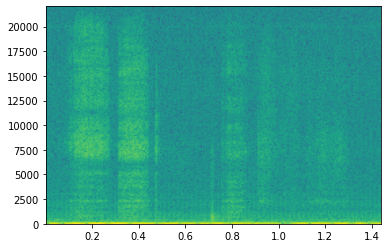

In [3]:
fs, x = scipy.io.wavfile.read("letters/1/A/PZ/0.wav")
plt.specgram(x, Fs=fs, NFFT=512, noverlap=256)
plt.show()
display(Audio(x, rate=fs))

In [4]:
letters = np.empty((4, 26, 20), dtype=object)
for i, j, k in np.ndindex(letters.shape):
    subject = i + 1
    letter = chr(ord("A") + j)
    fs, x = scipy.io.wavfile.read(f"letters/{subject}/{letter}/PZ/{k}.wav")
    letters[i, j, k] = x

In [5]:
# Split off 1/4 of data for testing.
train = letters[:, :, :15]
test = letters[:, :, 15:]

In [6]:
def some_filter(x):
    filtered = np.convolve(np.convolve(np.abs(np.diff(x)), np.ones(4096)), np.ones(1024))
    # What about dividing by peak rather than std? (Get range from 0-1, or maybe -1-1.)
    return (filtered - np.mean(filtered)) / np.std(filtered)

filtered_train = np.empty(train.shape, dtype=train.dtype)
for indices in np.ndindex(train.shape):
    filtered_train[indices] = some_filter(train[indices])

In [7]:
x = some_filter(train[0, 0, 0])

In [8]:
def nearest_neighbor(x, verbose=False):
    x = some_filter(x)
    best = None
    for indices in np.ndindex(filtered_train.shape):
        l = max(len(x), len(filtered_train[indices]))
        corr = np.max(scipy.signal.correlate(filtered_train[indices], x, mode='full')) / l
#         print(indices, corr)
        if best is None or corr > best[1]:
            best = (indices, corr)
    if verbose:
        print("Best match:", best[0])
        plt.plot(x)
        plt.plot(filtered_train[best[0]])
        plt.show()
#     return chr(ord("A") + best[0][1])
    return best[0]

Best match: (0, 0, 10)


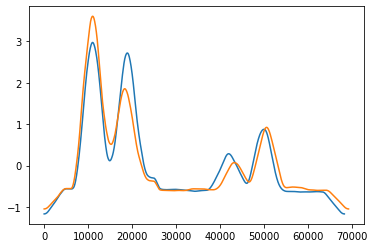

Best match: (0, 2, 14)


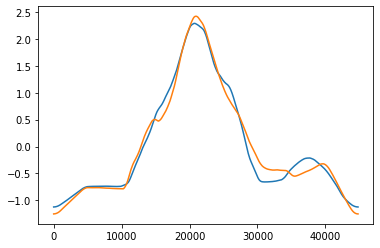

(0, 2, 14)

In [9]:
nearest_neighbor(test[0, 0, 0], verbose=True)
nearest_neighbor(test[0, 2, 0], verbose=True)

In [115]:
results2 = []
for indices in np.ndindex(test.shape):
    print(indices)
    results2.append((indices, nearest_neighbor(test[indices])))

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 4)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(0, 2, 0)
(0, 2, 1)
(0, 2, 2)
(0, 2, 3)
(0, 2, 4)
(0, 3, 0)
(0, 3, 1)
(0, 3, 2)
(0, 3, 3)
(0, 3, 4)
(0, 4, 0)
(0, 4, 1)
(0, 4, 2)
(0, 4, 3)
(0, 4, 4)
(0, 5, 0)
(0, 5, 1)
(0, 5, 2)
(0, 5, 3)
(0, 5, 4)
(0, 6, 0)
(0, 6, 1)
(0, 6, 2)
(0, 6, 3)
(0, 6, 4)
(0, 7, 0)
(0, 7, 1)
(0, 7, 2)
(0, 7, 3)
(0, 7, 4)
(0, 8, 0)
(0, 8, 1)
(0, 8, 2)
(0, 8, 3)
(0, 8, 4)
(0, 9, 0)
(0, 9, 1)
(0, 9, 2)
(0, 9, 3)
(0, 9, 4)
(0, 10, 0)
(0, 10, 1)
(0, 10, 2)
(0, 10, 3)
(0, 10, 4)
(0, 11, 0)
(0, 11, 1)
(0, 11, 2)
(0, 11, 3)
(0, 11, 4)
(0, 12, 0)
(0, 12, 1)
(0, 12, 2)
(0, 12, 3)
(0, 12, 4)
(0, 13, 0)
(0, 13, 1)
(0, 13, 2)
(0, 13, 3)
(0, 13, 4)
(0, 14, 0)
(0, 14, 1)
(0, 14, 2)
(0, 14, 3)
(0, 14, 4)
(0, 15, 0)
(0, 15, 1)
(0, 15, 2)
(0, 15, 3)
(0, 15, 4)
(0, 16, 0)
(0, 16, 1)
(0, 16, 2)
(0, 16, 3)
(0, 16, 4)
(0, 17, 0)
(0, 17, 1)
(0, 17, 2)
(0, 17, 3)
(0, 17, 4)
(0, 18, 0)
(0, 18, 1)
(0, 18, 2)
(0, 18, 3)
(0, 18, 4)
(0, 1

In [54]:
len(correct)

147

In [55]:
len(incorrect)

373

In [116]:
# results = correct + incorrect
import pickle
with open("filtered_nn2.pkl", "wb") as f:
    pickle.dump(results2, f)

In [117]:
cm = np.zeros((26, 26))
for te, tr in results2:
    cm[tr[1], te[1]] += 1

438 520 84.23076923076923


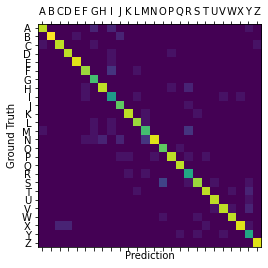

In [120]:
plt.matshow(cm)
plt.xticks(np.arange(26), alpha)
plt.yticks(np.arange(26), alpha)
plt.xlabel("Prediction")
plt.ylabel("Ground Truth")

correct = total = 0
for te, tr in results2:
    correct += int(tr[1] == te[1])
    total += 1
print(correct, total, correct / total * 100)

In [91]:
cm[4].sum()

142.0

In [96]:
hmm = [p for p in incorrect if p[1] == (0, 4, 8)]
print(len(hmm))
print(hmm[0])
test.shape
# 105 were confused with a *single* training sample...

105
((0, 2, 0), (0, 4, 8))


(4, 26, 5)

0.9999999999999999

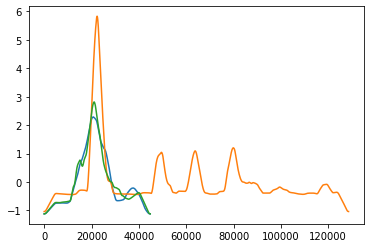

In [103]:
plt.plot(some_filter(test[0, 2, 0]))
plt.plot(filtered_train[0, 4, 8])
plt.plot(filtered_train[0, 2, 0])
np.std(filtered_train[0,4,8])

In [101]:
np.max(scipy.signal.correlate(filtered_train[0, 4, 8], filtered_train[0, 4, 8])) / len(filtered_train[0, 4, 8])

0.9999999999999993

In [105]:
np.max(scipy.signal.correlate(filtered_train[0, 4, 8], some_filter(test[0, 2, 0]))) / len(filtered_train[0, 2, 0])

1.2830070505755464

In [106]:
np.max(scipy.signal.correlate(filtered_train[0, 2, 0], some_filter(test[0, 2, 0]))) / len(filtered_train[0, 2, 0])

0.9705135639632796

In [56]:
correct[0]

((0, 0, 0), (0, 0, 4))

In [57]:
incorrect[0]

((0, 0, 2), (1, 12, 9))

In [65]:
alpha = ''.join(chr(c) for c in range(ord("A"), ord("Z") + 1))

In [67]:
alpha[12]

'M'

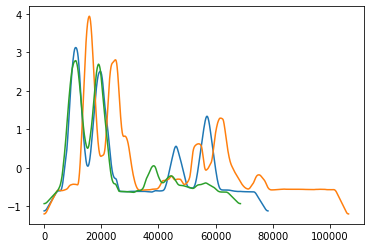

In [72]:
plt.plot(some_filter(test[incorrect[0][0]]))
plt.plot(filtered_train[incorrect[0][1]])
plt.plot(filtered_train[0, 0, 0])

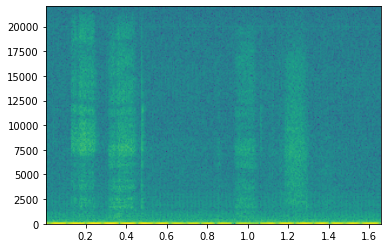

In [68]:
fs, x = scipy.io.wavfile.read("letters/1/A/PZ/17.wav")
plt.specgram(x, Fs=fs, NFFT=512, noverlap=256)
plt.show()
display(Audio(x, rate=fs))

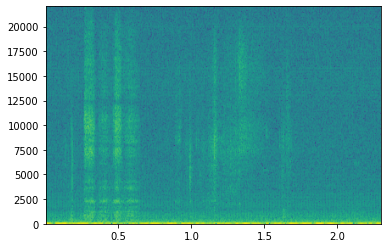

In [69]:
fs, x = scipy.io.wavfile.read("letters/2/M/PZ/9.wav")
plt.specgram(x, Fs=fs, NFFT=512, noverlap=256)
plt.show()
display(Audio(x, rate=fs))

In [17]:
# Now we do 4-fold cross-validation.
cross_validation = [[] for _ in letters]

In [25]:
import time
start = time.time()
for subject in range(letters.shape[0]):
    # Split off one subject for testing.
    train = np.vstack((letters[:subject], letters[subject+1:]))
    test = letters[subject][None]
    for i, indices in enumerate(np.ndindex(test.shape)):
        print(indices)
        cross_validation[subject].append((indices, nearest_neighbor(test[indices])))
        remaining = (time.time() - start) / (i + 1) * (test.size - (i + 1))
        print(f"{(i + 1) / test.size * 100:.2f}% -- ETA {int(remaining // 60):2}:{round(remaining % 60):02}")
end = time.time()
print(end - start)

(0, 0, 0)
0.19% -- ETA 54:55
(0, 0, 1)
0.38% -- ETA 56:50
(0, 0, 2)
0.58% -- ETA 55:53
(0, 0, 3)
0.77% -- ETA 56:24
(0, 0, 4)
0.96% -- ETA 59:58
(0, 0, 5)
1.15% -- ETA 59:05
(0, 0, 6)
1.35% -- ETA 58:36
(0, 0, 7)
1.54% -- ETA 59:01
(0, 0, 8)
1.73% -- ETA 59:04
(0, 0, 9)
1.92% -- ETA 60:22
(0, 0, 10)
2.12% -- ETA 59:39
(0, 0, 11)
2.31% -- ETA 59:20
(0, 0, 12)
2.50% -- ETA 59:28
(0, 0, 13)
2.69% -- ETA 59:33
(0, 0, 14)
2.88% -- ETA 60:09
(0, 0, 15)
3.08% -- ETA 59:39
(0, 0, 16)
3.27% -- ETA 59:32
(0, 0, 17)
3.46% -- ETA 59:14
(0, 0, 18)
3.65% -- ETA 59:05
(0, 0, 19)
3.85% -- ETA 59:00
(0, 1, 0)
4.04% -- ETA 58:36
(0, 1, 1)
4.23% -- ETA 58:13
(0, 1, 2)
4.42% -- ETA 57:52
(0, 1, 3)
4.62% -- ETA 57:31
(0, 1, 4)
4.81% -- ETA 57:12
(0, 1, 5)
5.00% -- ETA 56:55
(0, 1, 6)
5.19% -- ETA 56:38
(0, 1, 7)
5.38% -- ETA 56:22
(0, 1, 8)
5.58% -- ETA 56:07
(0, 1, 9)
5.77% -- ETA 55:52
(0, 1, 10)
5.96% -- ETA 55:37
(0, 1, 11)
6.15% -- ETA 55:22
(0, 1, 12)
6.35% -- ETA 55:09
(0, 1, 13)
6.54% -- ETA 54:57


51.73% -- ETA 28:57
(0, 13, 9)
51.92% -- ETA 28:49
(0, 13, 10)
52.12% -- ETA 28:42
(0, 13, 11)
52.31% -- ETA 28:34
(0, 13, 12)
52.50% -- ETA 28:26
(0, 13, 13)
52.69% -- ETA 28:18
(0, 13, 14)
52.88% -- ETA 28:11
(0, 13, 15)
53.08% -- ETA 28:04
(0, 13, 16)
53.27% -- ETA 27:56
(0, 13, 17)
53.46% -- ETA 27:48
(0, 13, 18)
53.65% -- ETA 27:41
(0, 13, 19)
53.85% -- ETA 27:34
(0, 14, 0)
54.04% -- ETA 27:26
(0, 14, 1)
54.23% -- ETA 27:18
(0, 14, 2)
54.42% -- ETA 27:10
(0, 14, 3)
54.62% -- ETA 27:02
(0, 14, 4)
54.81% -- ETA 26:54
(0, 14, 5)
55.00% -- ETA 26:46
(0, 14, 6)
55.19% -- ETA 26:38
(0, 14, 7)
55.38% -- ETA 26:30
(0, 14, 8)
55.58% -- ETA 26:22
(0, 14, 9)
55.77% -- ETA 26:14
(0, 14, 10)
55.96% -- ETA 26:06
(0, 14, 11)
56.15% -- ETA 25:58
(0, 14, 12)
56.35% -- ETA 25:50
(0, 14, 13)
56.54% -- ETA 25:42
(0, 14, 14)
56.73% -- ETA 25:34
(0, 14, 15)
56.92% -- ETA 25:27
(0, 14, 16)
57.12% -- ETA 25:19
(0, 14, 17)
57.31% -- ETA 25:11
(0, 14, 18)
57.50% -- ETA 25:03
(0, 14, 19)
57.69% -- ETA 24:55

1.92% -- ETA 2898:03
(0, 0, 10)
2.12% -- ETA 2634:46
(0, 0, 11)
2.31% -- ETA 2415:22
(0, 0, 12)
2.50% -- ETA 2229:41
(0, 0, 13)
2.69% -- ETA 2070:34
(0, 0, 14)
2.88% -- ETA 1933:01
(0, 0, 15)
3.08% -- ETA 1812:17
(0, 0, 16)
3.27% -- ETA 1705:50
(0, 0, 17)
3.46% -- ETA 1611:12
(0, 0, 18)
3.65% -- ETA 1526:30
(0, 0, 19)
3.85% -- ETA 1450:54
(0, 1, 0)
4.04% -- ETA 1381:48
(0, 1, 1)
4.23% -- ETA 1319:04
(0, 1, 2)
4.42% -- ETA 1261:52
(0, 1, 3)
4.62% -- ETA 1209:18
(0, 1, 4)
4.81% -- ETA 1161:03
(0, 1, 5)
5.00% -- ETA 1116:21
(0, 1, 6)
5.19% -- ETA 1074:59
(0, 1, 7)
5.38% -- ETA 1036:31
(0, 1, 8)
5.58% -- ETA 1000:51
(0, 1, 9)
5.77% -- ETA 967:32
(0, 1, 10)
5.96% -- ETA 936:23
(0, 1, 11)
6.15% -- ETA 907:10
(0, 1, 12)
6.35% -- ETA 879:43
(0, 1, 13)
6.54% -- ETA 853:52
(0, 1, 14)
6.73% -- ETA 829:30
(0, 1, 15)
6.92% -- ETA 806:28
(0, 1, 16)
7.12% -- ETA 784:40
(0, 1, 17)
7.31% -- ETA 764:01
(0, 1, 18)
7.50% -- ETA 744:24
(0, 1, 19)
7.69% -- ETA 725:46
(0, 2, 0)
7.88% -- ETA 707:35
(0, 2, 1)


51.92% -- ETA 81:16
(0, 13, 10)
52.12% -- ETA 80:44
(0, 13, 11)
52.31% -- ETA 80:12
(0, 13, 12)
52.50% -- ETA 79:40
(0, 13, 13)
52.69% -- ETA 79:09
(0, 13, 14)
52.88% -- ETA 78:38
(0, 13, 15)
53.08% -- ETA 78:07
(0, 13, 16)
53.27% -- ETA 77:36
(0, 13, 17)
53.46% -- ETA 77:05
(0, 13, 18)
53.65% -- ETA 76:34
(0, 13, 19)
53.85% -- ETA 76:04
(0, 14, 0)
54.04% -- ETA 75:35
(0, 14, 1)
54.23% -- ETA 75:07
(0, 14, 2)
54.42% -- ETA 74:38
(0, 14, 3)
54.62% -- ETA 74:10
(0, 14, 4)
54.81% -- ETA 73:42
(0, 14, 5)
55.00% -- ETA 73:14
(0, 14, 6)
55.19% -- ETA 72:46
(0, 14, 7)
55.38% -- ETA 72:19
(0, 14, 8)
55.58% -- ETA 71:52
(0, 14, 9)
55.77% -- ETA 71:25
(0, 14, 10)
55.96% -- ETA 70:58
(0, 14, 11)
56.15% -- ETA 70:31
(0, 14, 12)
56.35% -- ETA 70:04
(0, 14, 13)
56.54% -- ETA 69:37
(0, 14, 14)
56.73% -- ETA 69:11
(0, 14, 15)
56.92% -- ETA 68:44
(0, 14, 16)
57.12% -- ETA 68:17
(0, 14, 17)
57.31% -- ETA 67:51
(0, 14, 18)
57.50% -- ETA 67:26
(0, 14, 19)
57.69% -- ETA 66:59
(0, 15, 0)
57.88% -- ETA 66:32

1.92% -- ETA 6045:26
(0, 0, 10)
2.12% -- ETA 5492:17
(0, 0, 11)
2.31% -- ETA 5029:50
(0, 0, 12)
2.50% -- ETA 4638:19
(0, 0, 13)
2.69% -- ETA 4302:28
(0, 0, 14)
2.88% -- ETA 4012:25
(0, 0, 15)
3.08% -- ETA 3757:53
(0, 0, 16)
3.27% -- ETA 3533:39
(0, 0, 17)
3.46% -- ETA 3334:13
(0, 0, 18)
3.65% -- ETA 3155:48
(0, 0, 19)
3.85% -- ETA 2994:13
(0, 1, 0)
4.04% -- ETA 2848:22
(0, 1, 1)
4.23% -- ETA 2715:46
(0, 1, 2)
4.42% -- ETA 2594:44
(0, 1, 3)
4.62% -- ETA 2483:46
(0, 1, 4)
4.81% -- ETA 2381:60
(0, 1, 5)
5.00% -- ETA 2287:49
(0, 1, 6)
5.19% -- ETA 2200:33
(0, 1, 7)
5.38% -- ETA 2119:41
(0, 1, 8)
5.58% -- ETA 2044:19
(0, 1, 9)
5.77% -- ETA 1973:51
(0, 1, 10)
5.96% -- ETA 1907:53
(0, 1, 11)
6.15% -- ETA 1846:03
(0, 1, 12)
6.35% -- ETA 1787:60
(0, 1, 13)
6.54% -- ETA 1733:26
(0, 1, 14)
6.73% -- ETA 1682:04
(0, 1, 15)
6.92% -- ETA 1633:37
(0, 1, 16)
7.12% -- ETA 1587:42
(0, 1, 17)
7.31% -- ETA 1544:16
(0, 1, 18)
7.50% -- ETA 1503:04
(0, 1, 19)
7.69% -- ETA 1463:42
(0, 2, 0)
7.88% -- ETA 1425:5

51.54% -- ETA 137:19
(0, 13, 8)
51.73% -- ETA 136:22
(0, 13, 9)
51.92% -- ETA 135:26
(0, 13, 10)
52.12% -- ETA 134:29
(0, 13, 11)
52.31% -- ETA 133:33
(0, 13, 12)
52.50% -- ETA 132:38
(0, 13, 13)
52.69% -- ETA 131:44
(0, 13, 14)
52.88% -- ETA 130:50
(0, 13, 15)
53.08% -- ETA 129:56
(0, 13, 16)
53.27% -- ETA 129:02
(0, 13, 17)
53.46% -- ETA 128:08
(0, 13, 18)
53.65% -- ETA 127:15
(0, 13, 19)
53.85% -- ETA 126:20
(0, 14, 0)
54.04% -- ETA 125:28
(0, 14, 1)
54.23% -- ETA 124:35
(0, 14, 2)
54.42% -- ETA 123:42
(0, 14, 3)
54.62% -- ETA 122:50
(0, 14, 4)
54.81% -- ETA 121:58
(0, 14, 5)
55.00% -- ETA 121:06
(0, 14, 6)
55.19% -- ETA 120:15
(0, 14, 7)
55.38% -- ETA 119:24
(0, 14, 8)
55.58% -- ETA 118:34
(0, 14, 9)
55.77% -- ETA 117:43
(0, 14, 10)
55.96% -- ETA 116:54
(0, 14, 11)
56.15% -- ETA 116:05
(0, 14, 12)
56.35% -- ETA 115:15
(0, 14, 13)
56.54% -- ETA 114:26
(0, 14, 14)
56.73% -- ETA 113:36
(0, 14, 15)
56.92% -- ETA 112:48
(0, 14, 16)
57.12% -- ETA 111:59
(0, 14, 17)
57.31% -- ETA 111:11
(

1.35% -- ETA 12808:46
(0, 0, 7)
1.54% -- ETA 11191:16
(0, 0, 8)
1.73% -- ETA 9933:08
(0, 0, 9)
1.92% -- ETA 8927:10
(0, 0, 10)
2.12% -- ETA 8105:33
(0, 0, 11)
2.31% -- ETA 7419:22
(0, 0, 12)
2.50% -- ETA 6838:33
(0, 0, 13)
2.69% -- ETA 6340:49
(0, 0, 14)
2.88% -- ETA 5911:15
(0, 0, 15)
3.08% -- ETA 5533:28
(0, 0, 16)
3.27% -- ETA 5200:10
(0, 0, 17)
3.46% -- ETA 4904:09
(0, 0, 18)
3.65% -- ETA 4639:15
(0, 0, 19)
3.85% -- ETA 4401:20
(0, 1, 0)
4.04% -- ETA 4185:29
(0, 1, 1)
4.23% -- ETA 3989:09
(0, 1, 2)
4.42% -- ETA 3809:52
(0, 1, 3)
4.62% -- ETA 3645:32
(0, 1, 4)
4.81% -- ETA 3494:32
(0, 1, 5)
5.00% -- ETA 3355:05
(0, 1, 6)
5.19% -- ETA 3225:46
(0, 1, 7)
5.38% -- ETA 3105:52
(0, 1, 8)
5.58% -- ETA 2994:20
(0, 1, 9)
5.77% -- ETA 2890:14
(0, 1, 10)
5.96% -- ETA 2792:56
(0, 1, 11)
6.15% -- ETA 2701:34
(0, 1, 12)
6.35% -- ETA 2615:47
(0, 1, 13)
6.54% -- ETA 2535:01
(0, 1, 14)
6.73% -- ETA 2458:50
(0, 1, 15)
6.92% -- ETA 2386:57
(0, 1, 16)
7.12% -- ETA 2318:54
(0, 1, 17)
7.31% -- ETA 2254:3

50.96% -- ETA 190:57
(0, 13, 5)
51.15% -- ETA 189:34
(0, 13, 6)
51.35% -- ETA 188:11
(0, 13, 7)
51.54% -- ETA 186:50
(0, 13, 8)
51.73% -- ETA 185:28
(0, 13, 9)
51.92% -- ETA 184:08
(0, 13, 10)
52.12% -- ETA 182:47
(0, 13, 11)
52.31% -- ETA 181:28
(0, 13, 12)
52.50% -- ETA 180:08
(0, 13, 13)
52.69% -- ETA 178:50
(0, 13, 14)
52.88% -- ETA 177:32
(0, 13, 15)
53.08% -- ETA 176:14
(0, 13, 16)
53.27% -- ETA 174:57
(0, 13, 17)
53.46% -- ETA 173:41
(0, 13, 18)
53.65% -- ETA 172:25
(0, 13, 19)
53.85% -- ETA 171:09
(0, 14, 0)
54.04% -- ETA 169:55
(0, 14, 1)
54.23% -- ETA 168:41
(0, 14, 2)
54.42% -- ETA 167:28
(0, 14, 3)
54.62% -- ETA 166:15
(0, 14, 4)
54.81% -- ETA 165:02
(0, 14, 5)
55.00% -- ETA 163:51
(0, 14, 6)
55.19% -- ETA 162:40
(0, 14, 7)
55.38% -- ETA 161:29
(0, 14, 8)
55.58% -- ETA 160:19
(0, 14, 9)
55.77% -- ETA 159:09
(0, 14, 10)
55.96% -- ETA 157:59
(0, 14, 11)
56.15% -- ETA 156:49
(0, 14, 12)
56.35% -- ETA 155:40
(0, 14, 13)
56.54% -- ETA 154:32
(0, 14, 14)
56.73% -- ETA 153:24
(0, 